In [15]:
from Simulation import *
from Geometry import *
from mie_data import mie_10nm

# 10 nm radius 

In [2]:
%%time
mesh1 = Nanosphere(10,0)
mesh2 = Nanosphere(10,0)
mesh3 = Nanosphere(10,0)
sim1 = Simulation(mesh1)
sim2 = Simulation(mesh2)
sim3 = Simulation(mesh3)

Wall time: 1.27 s


In [6]:
%%time 
sim1.RefineMesh(400,700,tol=500)

DoF:  52911
Max Error:  1065.4493927951667
DoF:  82132
Max Error:  284.1516179026695
Wall time: 27.7 s


In [7]:
%%time 
sim2.RefineMesh(400,700,tol=250)

DoF:  52911
Max Error:  1065.4493927952155
DoF:  82132
Max Error:  284.15161790268445
DoF:  96268
Max Error:  136.50200913013785
Wall time: 54.4 s


In [8]:
%%time 
sim3.RefineMesh(400,700,tol=125)

DoF:  52911
Max Error:  1065.4493927951266
DoF:  82132
Max Error:  284.1516179026765
DoF:  96268
Max Error:  136.50200913015036
DoF:  276615
Max Error:  64.43320103353355
Wall time: 2min 18s


In [9]:
%%time
wavelength_list = np.linspace(400,700,50)
ext_list1 = np.array([(wavelength,sim1.Extinction(wavelength)) for wavelength in wavelength_list])

Wavelength:  400.0
Wavelength:  406.1224489795918
Wavelength:  412.2448979591837
Wavelength:  418.3673469387755
Wavelength:  424.48979591836735
Wavelength:  430.61224489795916
Wavelength:  436.734693877551
Wavelength:  442.85714285714283
Wavelength:  448.9795918367347
Wavelength:  455.1020408163265
Wavelength:  461.2244897959184
Wavelength:  467.3469387755102
Wavelength:  473.46938775510205
Wavelength:  479.59183673469386
Wavelength:  485.7142857142857
Wavelength:  491.83673469387753
Wavelength:  497.9591836734694
Wavelength:  504.0816326530612
Wavelength:  510.2040816326531
Wavelength:  516.3265306122449
Wavelength:  522.4489795918367
Wavelength:  528.5714285714286
Wavelength:  534.6938775510204
Wavelength:  540.8163265306123
Wavelength:  546.9387755102041
Wavelength:  553.0612244897959
Wavelength:  559.1836734693877
Wavelength:  565.3061224489795
Wavelength:  571.4285714285714
Wavelength:  577.5510204081633
Wavelength:  583.6734693877551
Wavelength:  589.795918367347
Wavelength:  595

In [10]:
ext_list2 = np.array([(wavelength,sim2.Extinction(wavelength)) for wavelength in wavelength_list])

Wavelength:  400.0
Wavelength:  406.1224489795918
Wavelength:  412.2448979591837
Wavelength:  418.3673469387755
Wavelength:  424.48979591836735
Wavelength:  430.61224489795916
Wavelength:  436.734693877551
Wavelength:  442.85714285714283
Wavelength:  448.9795918367347
Wavelength:  455.1020408163265
Wavelength:  461.2244897959184
Wavelength:  467.3469387755102
Wavelength:  473.46938775510205
Wavelength:  479.59183673469386
Wavelength:  485.7142857142857
Wavelength:  491.83673469387753
Wavelength:  497.9591836734694
Wavelength:  504.0816326530612
Wavelength:  510.2040816326531
Wavelength:  516.3265306122449
Wavelength:  522.4489795918367
Wavelength:  528.5714285714286
Wavelength:  534.6938775510204
Wavelength:  540.8163265306123
Wavelength:  546.9387755102041
Wavelength:  553.0612244897959
Wavelength:  559.1836734693877
Wavelength:  565.3061224489795
Wavelength:  571.4285714285714
Wavelength:  577.5510204081633
Wavelength:  583.6734693877551
Wavelength:  589.795918367347
Wavelength:  595

In [11]:
ext_list3 = np.array([(wavelength,sim2.Extinction(wavelength)) for wavelength in wavelength_list])

Wavelength:  400.0
Wavelength:  406.1224489795918
Wavelength:  412.2448979591837
Wavelength:  418.3673469387755
Wavelength:  424.48979591836735
Wavelength:  430.61224489795916
Wavelength:  436.734693877551
Wavelength:  442.85714285714283
Wavelength:  448.9795918367347
Wavelength:  455.1020408163265
Wavelength:  461.2244897959184
Wavelength:  467.3469387755102
Wavelength:  473.46938775510205
Wavelength:  479.59183673469386
Wavelength:  485.7142857142857
Wavelength:  491.83673469387753
Wavelength:  497.9591836734694
Wavelength:  504.0816326530612
Wavelength:  510.2040816326531
Wavelength:  516.3265306122449
Wavelength:  522.4489795918367
Wavelength:  528.5714285714286
Wavelength:  534.6938775510204
Wavelength:  540.8163265306123
Wavelength:  546.9387755102041
Wavelength:  553.0612244897959
Wavelength:  559.1836734693877
Wavelength:  565.3061224489795
Wavelength:  571.4285714285714
Wavelength:  577.5510204081633
Wavelength:  583.6734693877551
Wavelength:  589.795918367347
Wavelength:  595

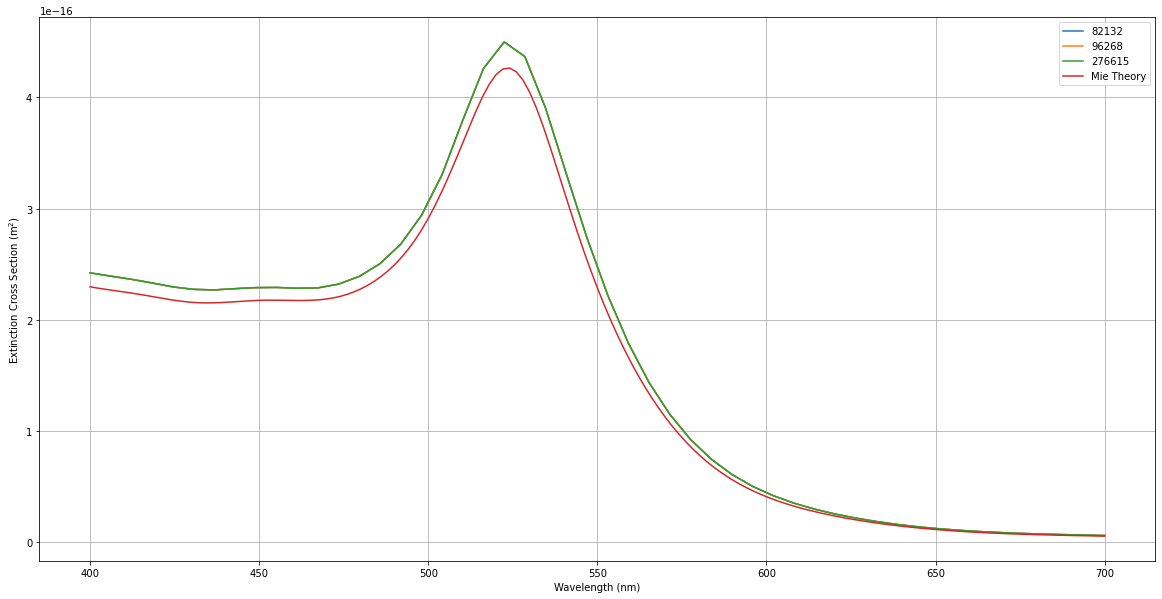

In [17]:
plt.figure(figsize=(20,10))
plt.plot(ext_list1[:,0],-ext_list1[:,1],label="82132")
plt.plot(ext_list1[:,0],-ext_list2[:,1],label="96268")
plt.plot(ext_list1[:,0],-ext_list3[:,1],label="276615")
plt.plot(mie_10nm[:,0]*1e+9,mie_10nm[:,1],label="Mie Theory")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Extinction Cross Section (m$^2$)")
plt.grid()
plt.legend()
plt.show()

# 40 nm radius

In [2]:
%%time
mesh1 = Nanosphere(40,0)
mesh2 = Nanosphere(40,0)
mesh3 = Nanosphere(40,0)
sim1 = Simulation(mesh1)
sim2 = Simulation(mesh2)
sim3 = Simulation(mesh3)


Wall time: 1.31 s


In [3]:
%%time 
sim1.RefineMesh(400,700,tol=5000)

DoF:  25332
Max Error:  66616.50554908153
DoF:  61573
Max Error:  17045.988859364727
DoF:  78413
Max Error:  9013.19762238738
DoF:  285380
Max Error:  4143.599463299936
Wall time: 2min 20s


In [4]:
%%time
sim2.RefineMesh(400,700,tol=2500)

DoF:  25332
Max Error:  66616.50554908263
DoF:  61573
Max Error:  17045.98885936504
DoF:  78413
Max Error:  9013.197622387554
DoF:  285380
Max Error:  4143.599463300002
DoF:  346605
Max Error:  2067.111106304028
Wall time: 3min 54s


In [5]:
%%time 
sim3.RefineMesh(400,700,tol=1250)

DoF:  25332
Max Error:  66616.50554908208
DoF:  61573
Max Error:  17045.9888593649
DoF:  78413
Max Error:  9013.197622387344
DoF:  285380
Max Error:  4143.599463300023
DoF:  346605
Max Error:  2067.1111063040116
DoF:  703819
Max Error:  1027.7181940280047
Wall time: 8min 4s


In [6]:
%%time
wavelength_list = np.linspace(400,700,50)
ext_list1 = np.array([(wavelength,sim1.Extinction(wavelength)) for wavelength in wavelength_list])

Wall time: 22min 23s


In [7]:
%%time
ext_list2 = np.array([(wavelength,sim2.Extinction(wavelength)) for wavelength in wavelength_list])

Wall time: 28min 25s


In [8]:
%%time
ext_list3 = np.array([(wavelength,sim3.Extinction(wavelength)) for wavelength in wavelength_list])

Wall time: 1h 8min 19s


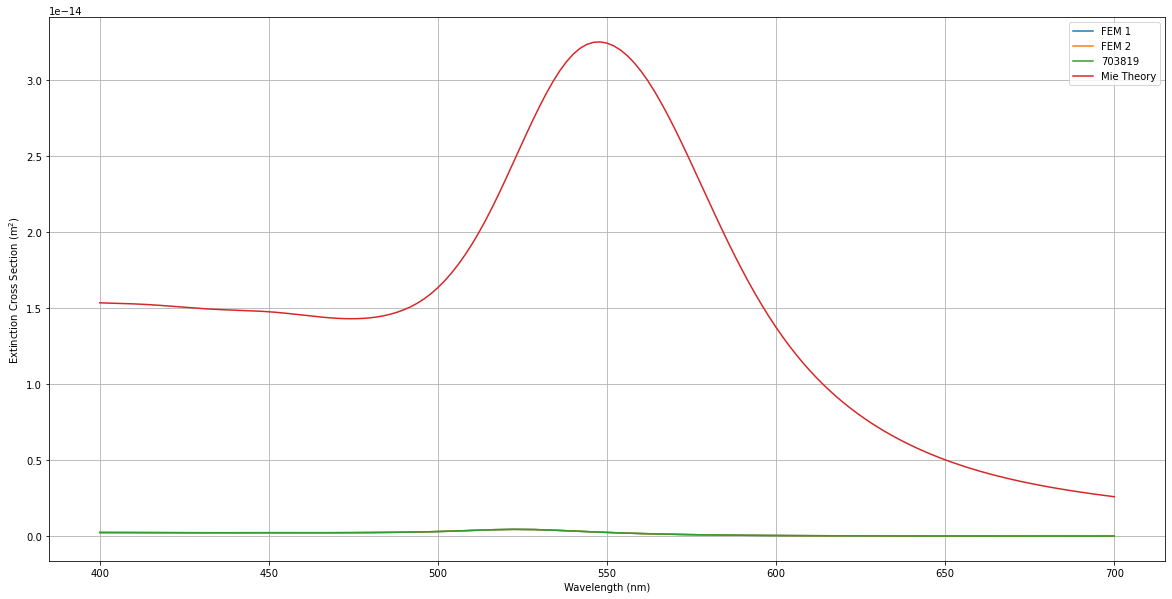

In [14]:
plt.figure(figsize=(20,10))
plt.plot(ext_list1[:,0],-ext_list1[:,1],label="FEM 1")
plt.plot(ext_list1[:,0],-ext_list2[:,1],label="FEM 2")
plt.plot(ext_list1[:,0],-ext_list3[:,1],label="FEM 3")
plt.plot(mie_list[:,0]*1e+9,mie_list[:,1],label="Mie Theory")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Extinction Cross Section (m$^2$)")
plt.grid()
plt.legend()
plt.show()

In [21]:
wavelengths1 = np.arange(400e-9,700e-9,1e-9)
extinctions = [Gold(wavelength*1e9) for wavelength in wavelengths1]